In [1]:
import torch

import torch.nn as nn
import torch.nn.functional as F

torch.set_default_dtype(torch.float32)

In [2]:
import pandas as pd

df = pd.read_csv('data/data_cleaned_twice.csv', index_col=0)
df = df.drop(columns=['student_id', 'name', 'is_female'])
df.head()

,class,gpa,is_greek,is_on_campus,distance_to_campus,is_sprinklered,claim_id,risk_tier,holdout,Business,Humanities,Other,Science,amount
3,3,1.203913,0,0,0.000000,1,0,2,0,0,1,0,0,0.0
7,3,0.609616,0,0,0.000000,1,0,2,0,0,0,0,1,0.0
11,3,3.073385,0,1,0.223942,0,0,2,0,1,0,0,0,0.0
15,4,3.224736,0,0,0.000000,0,0,3,0,1,0,0,0,0.0
19,2,2.687851,0,0,0.000000,0,0,1,0,1,0,0,0,0.0


In [3]:
# Separate the data into train and test sets based on the 'holdout' column
train_df = df[df['holdout'] == 0]
test_df = df[df['holdout'] == 1]

# Drop the 'holdout' column from the train and test sets
train_df = train_df.drop(columns=['holdout'])
test_df = test_df.drop(columns=['holdout'])

print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (8070, 13)
Test set shape: (1981, 13)


In [4]:
X_train = train_df.drop(columns=['risk_tier', 'amount']).to_numpy()
y_train = train_df[['risk_tier']].to_numpy().reshape(-1,1)

X_test = test_df.drop(columns=['risk_tier', 'amount']).to_numpy()
y_test = test_df[['risk_tier']].to_numpy().reshape(-1,1)

In [5]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# h = np.vectorize(lambda x: -1/x)
# h_inv = np.vectorize(lambda x: -1/x)

# # Initialize the model
# lr = LinearRegression()

# # Fit the model
# lr.fit(X_train, h(y_train))

# # Predict on the test set
# y_pred_lr = lr.predict(X_test)

# # Calculate the mean squared error
# mse_lr = mean_squared_error(y_test, y_pred_lr)
# print(f'Mean Squared Error (Linear Regression): {mse_lr}')

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0


In [7]:
X_train.shape

(8070, 11)

In [8]:
y_train.shape

(8070, 1)

In [9]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(11, 150)
        self.fc2 = nn.Linear(150, 300) ## add more layers as needed
        self.fc3 = nn.Linear(300, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # pass layers through init
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [10]:
inputs = torch.tensor(X_train,dtype=torch.float32)
labels = torch.tensor(y_train,dtype=torch.float32)

In [11]:
inputs.shape, labels.shape

(torch.Size([8070, 11]), torch.Size([8070, 1]))

In [12]:
net = Net()

learning_rate = 0.25
num_epochs = 250

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Training loop
# Convert X and y to torch tensors

for epoch in range(num_epochs):

    outputs = net(inputs)
    loss = criterion(outputs, labels) + 0.001 * sum(p.pow(2.0).sum() for p in net.parameters())
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/250], Loss: 0.1546
Epoch [2/250], Loss: 2.0499
Epoch [3/250], Loss: 0.2055
Epoch [4/250], Loss: 0.4281
Epoch [5/250], Loss: 1.1230
Epoch [6/250], Loss: 0.7476
Epoch [7/250], Loss: 0.1403
Epoch [8/250], Loss: 0.0686
Epoch [9/250], Loss: 0.4126
Epoch [10/250], Loss: 0.5718
Epoch [11/250], Loss: 0.3719
Epoch [12/250], Loss: 0.1062
Epoch [13/250], Loss: 0.0514
Epoch [14/250], Loss: 0.1828
Epoch [15/250], Loss: 0.2841
Epoch [16/250], Loss: 0.2376
Epoch [17/250], Loss: 0.1183
Epoch [18/250], Loss: 0.0549
Epoch [19/250], Loss: 0.0800
Epoch [20/250], Loss: 0.1273
Epoch [21/250], Loss: 0.1324
Epoch [22/250], Loss: 0.0961
Epoch [23/250], Loss: 0.0603
Epoch [24/250], Loss: 0.0503
Epoch [25/250], Loss: 0.0578
Epoch [26/250], Loss: 0.0638
Epoch [27/250], Loss: 0.0603
Epoch [28/250], Loss: 0.0504
Epoch [29/250], Loss: 0.0391
Epoch [30/250], Loss: 0.0312
Epoch [31/250], Loss: 0.0300
Epoch [32/250], Loss: 0.0335
Epoch [33/250], Loss: 0.0346
Epoch [34/250], Loss: 0.0284
Epoch [35/250], Loss: 0

In [16]:
torch.save(net, 'model_PP_risk_from_class.pt')

In [13]:
y_pred = net(torch.tensor(X_test,dtype=torch.float32))

In [14]:
with torch.no_grad():
    print(criterion(y_pred, torch.tensor(y_test, dtype=torch.float32)))

tensor(-0.)


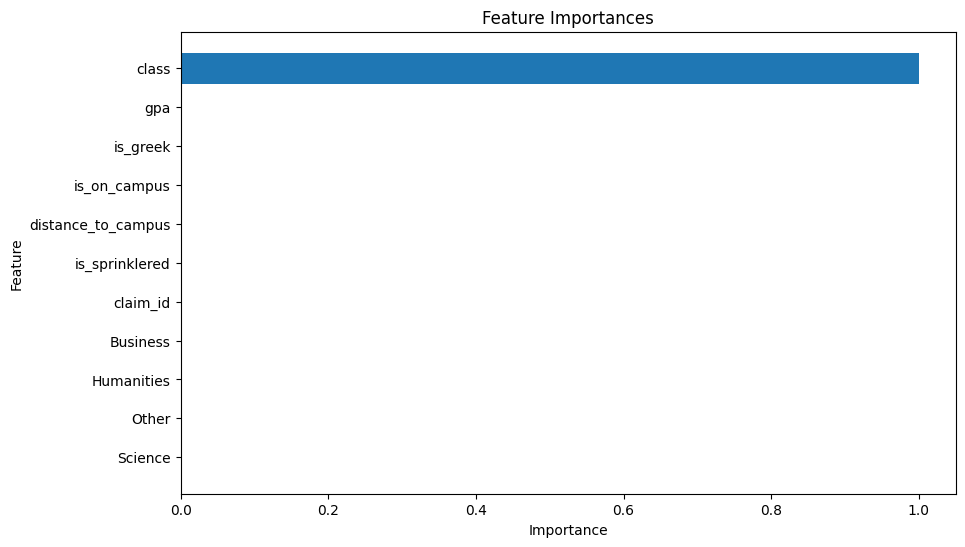

In [15]:
import matplotlib.pyplot as plt

# Get feature importances from the RandomForestRegressor model
importances = rf.feature_importances_

# Get the feature names from the training dataframe
feature_names = train_df.drop(columns=['risk_tier', 'amount']).columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()